In [331]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [332]:
df = pd.read_csv(r'C:\Users\PJanus\Desktop\data_science\2018_Statistical_Annex_Table_1_cleaned.csv')

In [333]:
df

,Country,Life expectancy at birth,Mean years of schooling,Gross national income (GNI) per capita (PPP $)
0,Afghanistan,64.047,3.780000,1823.529360
1,Albania,78.495,10.025110,11885.508140
2,Algeria,76.293,7.966570,13802.013070
3,Andorra,81.663,10.155450,47573.870080
4,Angola,61.809,5.125460,5789.861511
5,Antigua and Barbuda,76.519,9.236180,20763.644270
6,Argentina,76.738,9.949430,18460.736650
7,Armenia,74.782,11.667510,9143.677637
8,Australia,83.068,12.855040,43560.057740
9,Austria,81.770,12.148713,45415.101180


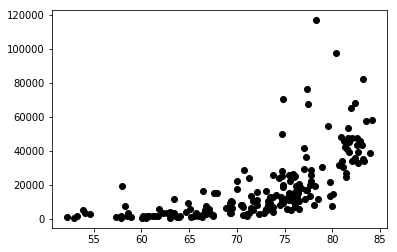

In [334]:
x = df['Life expectancy at birth']
y = df['Gross national income (GNI) per capita (PPP $)']

plt.plot(x, y, 'o', color='black');

In [335]:
features = list(df.columns)[1:]

In [336]:
x = df.loc[:, features].values # Separating out the target
y = df.loc[:,['Country']].values # Standardizing the features
x = StandardScaler().fit_transform(x)

In [337]:
x

array([[-1.06468822e+00, -1.54387274e+00, -8.29041102e-01],
       [ 8.31971818e-01,  4.77550152e-01, -3.14933379e-01],
       [ 5.42904446e-01, -1.88759949e-01, -2.17011289e-01],
       [ 1.24785076e+00,  5.19738722e-01,  1.50853126e+00],
       [-1.35848148e+00, -1.10837302e+00, -6.26384941e-01],
       [ 5.72572577e-01,  2.22188571e-01,  1.38686973e-01],
       [ 6.01321785e-01,  4.53053981e-01,  2.10219870e-02],
       [ 3.44548043e-01,  1.00916368e+00, -4.55024733e-01],
       [ 1.43229202e+00,  1.39354447e+00,  1.30344914e+00],
       [ 1.26189718e+00,  1.16491997e+00,  1.39823091e+00],
       [-4.51196759e-03,  7.05874666e-01, -1.25164312e-01],
       [ 4.81205233e-01,  8.18965540e-01,  4.41009736e-01],
       [ 6.40704260e-01,  2.79043123e-01,  1.20227616e+00],
       [ 8.54113521e-02, -8.95436297e-01, -7.34343608e-01],
       [ 5.11923565e-01,  6.49680423e-01, -1.12731833e-01],
       [ 1.19805381e-01,  1.20217137e+00, -8.81801556e-02],
       [ 1.20059179e+00,  1.04683366e+00

In [338]:
df_reduced = pd.DataFrame.from_records(x)
df_reduced.columns = ['Life expectancy at birth','Mean years of schooling','Gross national income (GNI) per capita (PPP $)']
df_reduced

,Life expectancy at birth,Mean years of schooling,Gross national income (GNI) per capita (PPP $)
0,-1.064688,-1.543873,-0.829041
1,0.831972,0.477550,-0.314933
2,0.542904,-0.188760,-0.217011
3,1.247851,0.519739,1.508531
4,-1.358481,-1.108373,-0.626385
5,0.572573,0.222189,0.138687
6,0.601322,0.453054,0.021022
7,0.344548,1.009164,-0.455025
8,1.432292,1.393544,1.303449
9,1.261897,1.164920,1.398231


In [339]:
clustering_kmeans = KMeans(n_clusters=3, precompute_distances="auto", n_jobs=-1)

In [340]:
df_reduced['clusters'] = clustering_kmeans.fit_predict(df_reduced)

In [341]:
df_reduced

,Life expectancy at birth,Mean years of schooling,Gross national income (GNI) per capita (PPP $),clusters
0,-1.064688,-1.543873,-0.829041,2
1,0.831972,0.477550,-0.314933,0
2,0.542904,-0.188760,-0.217011,0
3,1.247851,0.519739,1.508531,1
4,-1.358481,-1.108373,-0.626385,2
5,0.572573,0.222189,0.138687,0
6,0.601322,0.453054,0.021022,0
7,0.344548,1.009164,-0.455025,0
8,1.432292,1.393544,1.303449,1
9,1.261897,1.164920,1.398231,1


In [342]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_reduced)
df_pca = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

In [343]:
df_pca

,pca1,pca2
0,2.287361,0.482114
1,-0.881121,-0.895758
2,-0.381440,-0.742925
3,-1.677074,1.053528
4,2.111923,0.587689
5,-0.802541,-0.543484
6,-0.894504,-0.651035
7,-0.835998,-1.028492
8,-2.183479,0.808867
9,-2.000161,0.906690


In [344]:
df_pca = pd.concat([df_pca, df_reduced[['clusters']]], axis = 1)

In [345]:
df_pca = pd.concat([df_pca, df[['Country']]], axis = 1)

In [346]:
df_pca

,pca1,pca2,clusters,Country
0,2.287361,0.482114,2,Afghanistan
1,-0.881121,-0.895758,0,Albania
2,-0.381440,-0.742925,0,Algeria
3,-1.677074,1.053528,1,Andorra
4,2.111923,0.587689,2,Angola
5,-0.802541,-0.543484,0,Antigua and Barbuda
6,-0.894504,-0.651035,0,Argentina
7,-0.835998,-1.028492,0,Armenia
8,-2.183479,0.808867,1,Australia
9,-2.000161,0.906690,1,Austria


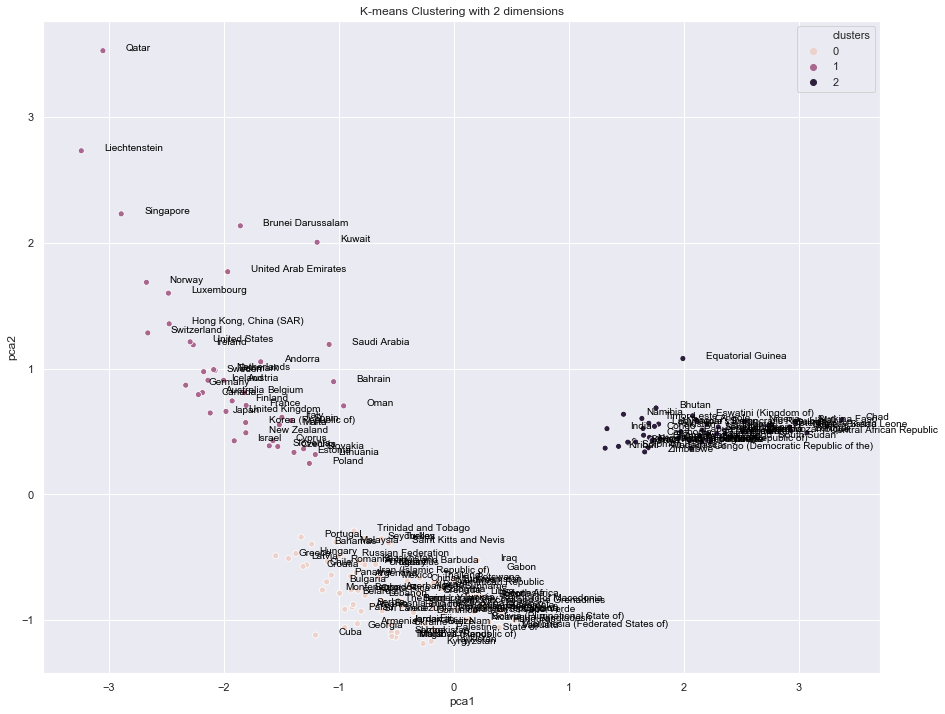

In [375]:
# https://python-graph-gallery.com/46-add-text-annotation-on-scatterplot/
sns.set(rc={'figure.figsize':(15, 12)})
p1 = sns.scatterplot(data=df_pca, x="pca1", y="pca2", hue=df_pca['clusters'])
# p1.text(2, 2, "An annotation", horizontalalignment='left', size='medium', color='black', weight='semibold')
for line in range(0,df_pca.shape[0]): 
    p1.text(df_pca.pca1[line]+0.2, df_pca.pca2[line], df_pca.Country[line], horizontalalignment='left', size='small', color='black') 
plt.title('K-means Clustering with 2 dimensions')
plt.show()

In [ ]:
pca.explained_variance_ratio_

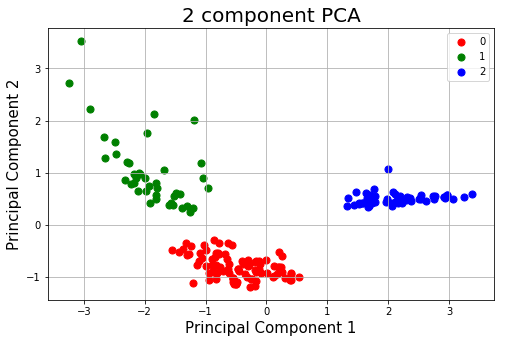

In [367]:
fig = plt.figure(figsize = (8,5))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = [0, 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = df_pca['clusters'] == target
    ax.scatter(df_pca.loc[indicesToKeep, 'pca1']
               , df_pca.loc[indicesToKeep, 'pca2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()